<a href="https://colab.research.google.com/github/choundurvishnu/Advance-Machine-Learning/blob/main/NMT_English_to_tamil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers sentencepiece datasets
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset, DatasetDict, Dataset
from google.colab import drive
from IPython.display import display
from IPython.html import widgets

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch

from torch import optim
from torch.nn import functional as F

import tqdm
# from tqdm import tqdm_notebook

from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import get_linear_schedule_with_warmup

#sns.set()

/usr/local/lib/python3.10/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [ ]:
from google.colab import drive
drive.mount('/content/drive') #/drive

Mounted at /content/drive


In [ ]:
!pip show google-api-python-client


Name: google-api-python-client
Version: 2.84.0
Summary: Google API Client Library for Python
Home-page: https://github.com/googleapis/google-api-python-client/
Author: Google LLC
Author-email: googleapis-packages@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: google-api-core, google-auth, google-auth-httplib2, httplib2, uritemplate
Required-by: earthengine-api, firebase-admin, google-generativeai, PyDrive, PyDrive2


In [ ]:
# Check Python version
import sys
print("Python version:", sys.version)

# Check library versions
import transformers
import sentencepiece
import datasets
import sacrebleu
import google.colab
import matplotlib
import pandas
import IPython



print("Google Colab version:", google.colab.__version__)

print("Transformers version:", transformers.__version__)
print("Sentencepiece version:", sentencepiece.__version__)
print("Datasets version:", datasets.__version__)
print("Sacrebleu version:", sacrebleu.__version__)
print("Torch version:", torch.__version__)
print("GPU version - CUDA:", torch.version.cuda)
print("Matplot lib:", matplotlib.__version__)
print("Pandas:", pandas.__version__)
print("Seaborn:", sns.__version__)
print("Numpy:", np.__version__)
print("IPython:", IPython.__version__)


Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Google Colab version: 0.0.1a2
Transformers version: 4.40.0
Sentencepiece version: 0.1.99
Datasets version: 2.19.0
Sacrebleu version: 2.4.2
Torch version: 2.2.1+cu121
GPU version - CUDA: 12.1
Matplot lib: 3.7.1
Pandas: 2.0.3
Seaborn: 0.13.1
Numpy: 1.25.2
IPython: 7.34.0


In [ ]:
!pip show google-colab

Name: google-colab
Version: 1.0.0
Summary: Google Colaboratory tools
Home-page: https://colaboratory.research.google.com/
Author: Google Colaboratory team
Author-email: colaboratory-team@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: google-auth, ipykernel, ipython, notebook, pandas, portpicker, requests, tornado
Required-by: 


In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
print("Google Colab version:", google.colab.__version__)

Google Colab version: 0.0.1a2


In [ ]:
# Check Python version
import sys

# Check library versions
import transformers
import sentencepiece
import datasets
import sacrebleu

# Write to requirements.txt
with open("/content/drive/My Drive/ATML_1/requirements.txt", "w") as f:
    f.write(f"Python=={sys.version}\n")
    f.write(f"transformers=={transformers.__version__}\n")
    f.write(f"sentencepiece=={sentencepiece.__version__}\n")
    f.write(f"datasets=={datasets.__version__}\n")
    f.write(f"sacrebleu=={sacrebleu.__version__}\n")
    f.write(f"cuda=={torch.version.cuda}\n")
    f.write(f"torch=={torch.__version__}\n")
    f.write(f"Google Colab=={google.colab.__version__}\n")
    f.write(f"matplotlib=={matplotlib.__version__}")
    f.write(f"pandas=={pd.__version__}")
    f.write(f"seaborn=={sns.__version__}")
    f.write(f"numpy=={np.__version__}")
    f.write(f"IPython=={IPython.__version__}")
print("requirements.txt file created successfully.")




requirements.txt file created successfully.


*   Train dataset: [Training Dataset](https://drive.google.com/drive/folders/1EfRe9NMoZSW3JeACsonwvxK-Yl0bIGVF?usp=drive_link)
*   Test dataset: [Test Dataset](https://drive.google.com/drive/folders/1ZQ8c7431PJmSKmxw3tiMiA4W0RoF-8bW?usp=drive_link)
*   Validation dataset: [Validation Dataset](https://drive.google.com/drive/folders/1A7H_jALPRjo3C006AWdo9Cxr0rq0JWea?usp=drive_link)

In [ ]:
directory = '/content/drive/My Drive/ATML_1/data/en-ta/'

In [ ]:
files = {
    "train": (directory+"train/train.en", directory+"train/train.ta"),
    "validation": (directory+"dev/dev.en", directory+"dev/dev.ta"),
    "test": (directory+"test/test.en", directory+"test/test.ta")
}

In [ ]:
def load_data(files):
    data = {}
    for split, (en_file, ta_file) in files.items():
        # Open the files and read the lines
        with open(en_file, encoding="utf-8") as en_f, open(ta_file, encoding="utf-8") as ta_f:
            en_lines = [line.strip() for line in en_f if line.strip()]
            ta_lines = [line.strip() for line in ta_f if line.strip()]

        # Check if the number of lines matches
        if len(en_lines) != len(ta_lines):
            raise ValueError(f"The number of lines in the files for '{split}' split doesn't match.")

        # Combine the lines into translation pairs
        translations = [{"en": en, "ta": ta} for en, ta in zip(en_lines, ta_lines)]
        data[split] = Dataset.from_dict({"translation": translations})

    return DatasetDict(data)



dataset = load_data(files)

In [ ]:
from datasets import load_dataset

def separate_sentences(dataset):
    # Initialize dictionaries to hold separated sentences
    en_sentences = []
    ta_sentences = []

    # Iterate through the dataset
    for example in dataset:
        # Append English and Tamil sentences to their respective lists
        en_sentences.append(example['translation']['en'])
        ta_sentences.append(example['translation']['ta'])

    return en_sentences, ta_sentences
    # Process each split
train_en1, train_ta1 = separate_sentences(dataset['train'])
validation_en1, validation_ta1 = separate_sentences(dataset['validation'])
test_en1, test_ta1 = separate_sentences(dataset['test'])


In [ ]:

    # Process each split
train_en1, train_ta1 = separate_sentences(dataset['train'])
validation_en1, validation_ta1 = separate_sentences(dataset['validation'])
test_en1, test_ta1 = separate_sentences(dataset['test'])



In [ ]:
train_en1[0:20]

['Some 14 months later, the second calf is born.',
 '"Senior advocate Kapil Sibal, who was appearing for Chidambaram, said the condition was not justified for a member of Parliament and ""he would not run away anywhere."""',
 'This photo was taken then.',
 'So far two rounds of the JWG meeting have been held.',
 'The life of the world is nothing but play and diversion, and the abode of the Hereafter is surely better for those who are Godwary. Do you not exercise your reason?',
 'The maximum temperature will be 35 degrees Celsius and the minimum will settle at 27 degree.',
 "I think with all these lives what you're going to find is that your own experience tends to color a good deal which one you pick as closer to the top or closer to the bottom and the idea of a sibling or a child that's no longer involved with the family if your experience with that is very painful, then the chances are that you'll kind of push that one to the bottom.",
 'If they agreed with a point the speaker made, 

In [ ]:
train_ta1[0:20]

['சுமார் 14 மாதங்கள் கழித்து, இரண்டாம் கன்றை ஈனுகிறது.',
 '‘காா்த்தி சிதம்பரம் எம். பி. யாக உள்ளதால் எங்கும் தப்பிவிட மாட்டாா்’ என்று அவரது சாா்பில் ஆஜரான மூத்த வழக்குரைஞா் கபில் சிபல் வாதாடினாா்.',
 'அதன்போது எடுக்கப்பட்ட புகைப்படம் இது.',
 'இதுவரை இணைப் பணிக் குழு இரண்டுகட்ட பேச்சுவார்த்தை முடிவடைந்துள்ளது.',
 'உலக வாழ்க்கை வீணும் விளையாட்டுமேயன்றி வேறில்லை பயபக்தியுடையவர்களுக்கு நிச்சயமாக மறுமை வீடே மிகவும் மேலானதாகும். நீங்கள் இதைப் புரிந்து கொள்ள வேண்டாமா?',
 'அதிகபட்ச வெப்பநிலை 35 டிகிரி செல்சியஸாகவும் குறைந்தபட்சம் 27 டிகிரி செல்சியஸாகவும் இருக்கும்.',
 'இந்த எல்லா உயிர்களிலும் நீங்கள் கண்டுபிடிக்கப் போவது இதுதான் என்று நான் நினைக்கிறேன் உங்கள் சொந்த அனுபவம் நீங்கள் தேர்ந்தெடுக்கும் ஒரு நல்ல ஒப்பந்தத்தை வண்ணமயமாக்குகிறது மேலே நெருக்கமாக அல்லது கீழே நெருக்கமாக மற்றும் யோசனை ஒரு உடன்பிறப்பு அல்லது இனி சம்பந்தப்படாத குழந்தை உங்கள் அனுபவம் மிகவும் வேதனையாக இருந்தால் குடும்பத்துடன், பின்னர் நீங்கள் அதை கீழே தள்ளும் வாய்ப்புகள் உள்ளன.',
 'பேச்சாளர் சொன்ன ஒரு குறிப்போடு அவர்கள் ஒத்திர

In [ ]:
dataset['train']['translation']['ta'][0:10]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 5264867
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 2390
    })
})

In [ ]:
dataset['train'][0:10]

{'translation': {'en': 'Some 14 months later, the second calf is born.',
  'ta': 'சுமார் 14 மாதங்கள் கழித்து, இரண்டாம் கன்றை ஈனுகிறது.'}}

In [ ]:
dataset1 = dataset
dataset1['train'] = dataset1['train'].select(range(1000000))

In [ ]:
model_repo = 'google/mt5-small'
tokenizer = AutoTokenizer.from_pretrained(model_repo)
model = AutoModelForSeq2SeqLM.from_pretrained(model_repo)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
if torch.cuda.is_available():   #CUDA = torch.cuda.is_available()
  model = model.cuda()

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 1000000
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 2390
    })
})

In [ ]:
train1 = dataset1['train']
test1 = dataset1['test']
valid1 = dataset1['validation']

In [ ]:
len(train1)

1000000

In [ ]:
import pandas as pd

def create_translation_df(dataset):
    source = [e['en'] for e in dataset['translation']]
    target = [e['ta'] for e in dataset['translation']]
    return pd.DataFrame({
        'source': source,
        'target': target
    })

# Applying the function to each dataset
valid_df = create_translation_df(valid1)
test_df = create_translation_df(test1)
train_df = create_translation_df(train1)


In [ ]:
import torch

def encode_texts(df, column, tokenizer, max_length):
    # List comprehension for encoding the texts
    encoded = [tokenizer.encode(text, return_tensors="np", padding="max_length", truncation=True, max_length=max_length)[0]
               for text in df[column]]
    return torch.tensor(encoded)


In [ ]:
# Encoding source and target texts
input_pt = encode_texts(train_df, 'source', tokenizer, model.config.max_length)
output_pt = encode_texts(train_df, 'target', tokenizer, model.config.max_length)

# Moving tensors to GPU if available
if torch.cuda.is_available():
    input_pt = input_pt.cuda()
    output_pt = output_pt.cuda()

print(len(input_pt), len(output_pt))
print(input_pt.shape)
print(output_pt.shape)

<ipython-input-16-a3b67471ac83>:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  return torch.tensor(encoded)


1000000 1000000
torch.Size([1000000, 20])
torch.Size([1000000, 20])


In [ ]:
n_epochs = 3
batch_size = 16
print_freq = 500
checkpoint_freq = 100
lr = 5e-4
n_batches = int(np.ceil(len(train_df) / batch_size))
total_steps = n_epochs * n_batches
n_warmup_steps = int(total_steps * 0.01)





In [ ]:
# Optimizer
optimizer = AdamW(model.parameters(), lr=lr)
scheduler = get_linear_schedule_with_warmup(optimizer, n_warmup_steps, total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
def get_data_generator(inputs, outputs, batch_size=16):  # 16
  # inputs = inputs.shuffle()
  # outputs = outputs.shuffle()

  for i in range(0, len(inputs), batch_size):
    input_batch = inputs[i:i+batch_size]
    output_batch = outputs[i:i+batch_size]

    yield (input_batch, output_batch)

In [ ]:
def eval_model(model, gdataset, max_iters=8):
  test_generator = get_data_generator(input_pt, output_pt, batch_size)
  eval_losses = []
  for i, (input_batch, label_batch) in enumerate(test_generator):
    if i >= max_iters:
      break

    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)
    eval_losses.append(model_out.loss.item())

  return np.mean(eval_losses)


In [ ]:
losses = []

In [ ]:
for epoch_idx in range(n_epochs):
  # Randomize data order
  data_generator = get_data_generator(input_pt, output_pt, batch_size)

  for batch_idx, (input_batch, label_batch) in tqdm.notebook.tqdm(enumerate(data_generator), total=n_batches):
    optimizer.zero_grad()

    # Forward pass
    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)

    # Calculate loss and update weights
    loss = model_out.loss
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Print training update info
    if (batch_idx + 1) % print_freq == 0:
      avg_loss = np.mean(losses[-print_freq:])
      print('Epoch: {} | Step: {} | Avg. loss: {:.3f} | lr: {}'.format(
          epoch_idx+1, batch_idx+1, avg_loss, scheduler.get_last_lr()[0]))

    if (batch_idx + 1) % checkpoint_freq == 0:
      test_loss = eval_model(model, test_df)
      print('Test loss of {:.3f}'.format(test_loss))
      # torch.save(model.state_dict(), model_path)


  0%|          | 0/62500 [00:00<?, ?it/s]

Test loss of 24.793
Test loss of 14.088
Test loss of 8.770
Test loss of 6.631
Epoch: 1 | Step: 500 | Avg. loss: 15.634 | lr: 0.00013333333333333334
Test loss of 5.133
Test loss of 3.973
Test loss of 3.469
Test loss of 3.223
Test loss of 3.022
Epoch: 1 | Step: 1000 | Avg. loss: 3.559 | lr: 0.0002666666666666667
Test loss of 2.865
Test loss of 2.733
Test loss of 2.620
Test loss of 2.538
Test loss of 2.508
Epoch: 1 | Step: 1500 | Avg. loss: 2.602 | lr: 0.0004
Test loss of 2.468
Test loss of 2.440
Test loss of 2.410
Test loss of 2.393
Test loss of 2.377
Epoch: 1 | Step: 2000 | Avg. loss: 2.411 | lr: 0.0004996632996632996
Test loss of 2.351
Test loss of 2.312
Test loss of 2.311
Test loss of 2.286
Test loss of 2.275
Epoch: 1 | Step: 2500 | Avg. loss: 2.294 | lr: 0.0004983164983164984
Test loss of 2.267
Test loss of 2.253
Test loss of 2.238
Test loss of 2.220
Test loss of 2.205
Epoch: 1 | Step: 3000 | Avg. loss: 2.222 | lr: 0.000496969696969697
Test loss of 2.190
Test loss of 2.193
Test loss 

  0%|          | 0/62500 [00:00<?, ?it/s]

Test loss of 1.126
Test loss of 1.184
Test loss of 1.196
Test loss of 1.209
Epoch: 2 | Step: 500 | Avg. loss: 1.612 | lr: 0.00033535353535353536
Test loss of 1.215
Test loss of 1.245
Test loss of 1.253
Test loss of 1.246
Test loss of 1.246
Epoch: 2 | Step: 1000 | Avg. loss: 1.604 | lr: 0.00033400673400673406
Test loss of 1.260
Test loss of 1.260
Test loss of 1.262
Test loss of 1.274
Test loss of 1.275
Epoch: 2 | Step: 1500 | Avg. loss: 1.574 | lr: 0.00033265993265993264
Test loss of 1.281
Test loss of 1.283
Test loss of 1.291
Test loss of 1.305
Test loss of 1.299
Epoch: 2 | Step: 2000 | Avg. loss: 1.576 | lr: 0.00033131313131313134
Test loss of 1.306
Test loss of 1.312
Test loss of 1.304
Test loss of 1.315
Test loss of 1.319
Epoch: 2 | Step: 2500 | Avg. loss: 1.562 | lr: 0.00032996632996633
Test loss of 1.329
Test loss of 1.335
Test loss of 1.332
Test loss of 1.338
Test loss of 1.336
Epoch: 2 | Step: 3000 | Avg. loss: 1.567 | lr: 0.0003286195286195287
Test loss of 1.344
Test loss of 1.

  0%|          | 0/62500 [00:00<?, ?it/s]

Test loss of 1.057
Test loss of 1.076
Test loss of 1.083
Test loss of 1.093
Epoch: 3 | Step: 500 | Avg. loss: 1.389 | lr: 0.00016700336700336703
Test loss of 1.103
Test loss of 1.108
Test loss of 1.111
Test loss of 1.115
Test loss of 1.114
Epoch: 3 | Step: 1000 | Avg. loss: 1.381 | lr: 0.00016565656565656567
Test loss of 1.115
Test loss of 1.120
Test loss of 1.123
Test loss of 1.125
Test loss of 1.130
Epoch: 3 | Step: 1500 | Avg. loss: 1.356 | lr: 0.00016430976430976434
Test loss of 1.129
Test loss of 1.133
Test loss of 1.142
Test loss of 1.146
Test loss of 1.138
Epoch: 3 | Step: 2000 | Avg. loss: 1.359 | lr: 0.00016296296296296298
Test loss of 1.138
Test loss of 1.148
Test loss of 1.144
Test loss of 1.147
Test loss of 1.151
Epoch: 3 | Step: 2500 | Avg. loss: 1.347 | lr: 0.00016161616161616162
Test loss of 1.158
Test loss of 1.164
Test loss of 1.162
Test loss of 1.164
Test loss of 1.162
Epoch: 3 | Step: 3000 | Avg. loss: 1.352 | lr: 0.00016026936026936026
Test loss of 1.163
Test loss o

In [ ]:
import torch
from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from torch.optim.lr_scheduler import LambdaLR
import numpy as np
import pandas as pd
from sacrebleu import corpus_bleu

# Assume model and tokenizer have been initialized as shown earlier

def save_model_and_tokenizer(model, tokenizer, model_path, tokenizer_path):
    model.save_pretrained(model_path)
    tokenizer.save_pretrained(tokenizer_path)

#torch.save(model.state_dict(), model_path)

In [ ]:
# 2. Load the model and tokenizer
def load_model_and_tokenizer(model_path, tokenizer_path):
    model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)
    if torch.cuda.is_available():
        model = model.cuda()
    return model, tokenizer

In [ ]:
#model_path = '/content/drive/My Drive/ATML_1/data/en-ta/model_check/model_checkpoint.pth'
model_path = '/content/drive/My Drive/ATML_1/data/en-ta/model_check/model/'
tokenizer_path = '/content/drive/My Drive/ATML_1/data/en-ta/model_check/tokenizer/'
save_model_and_tokenizer(model, tokenizer, model_path, tokenizer_path)

#model = load_model(model, model_path)

In [ ]:
model, tokenizer = load_model_and_tokenizer(model_path, tokenizer_path)

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


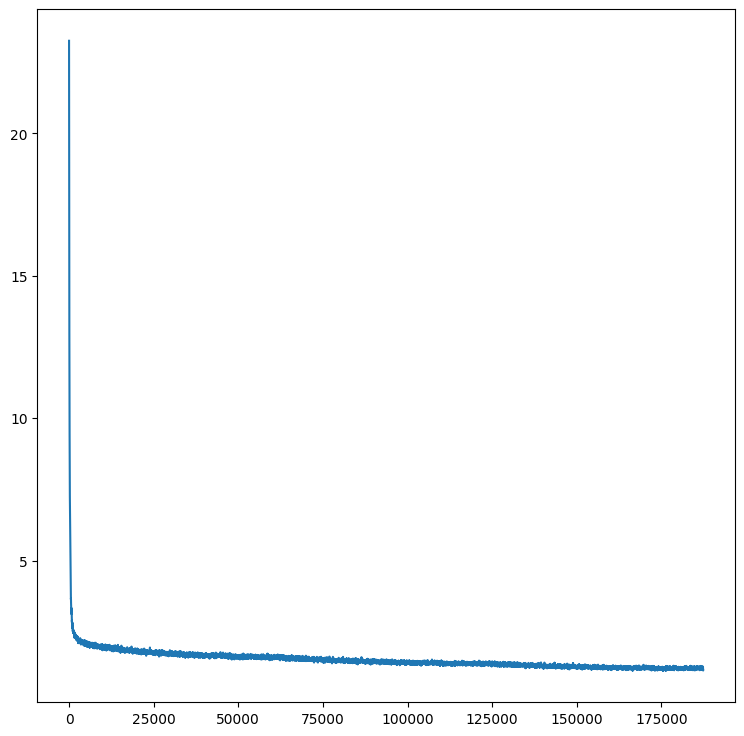

In [ ]:
window_size = 50
smoothed_losses = []
for i in range(len(losses)-window_size):
  smoothed_losses.append(np.mean(losses[i:i+window_size]))

plt.figure(figsize=(9, 9))
plt.plot(smoothed_losses[100:])

In [ ]:
# Evaluate model and calculate BLEU score
##### No Correct
def evaluate_bleu(model, tokenizer, dataset, max_length, device="cuda"):
    model.eval()
    references = []
    hypotheses = []
    for example in dataset:
        src_text = example['source']
        tgt_text = example['target']
        references.append([tgt_text])
        encoded_input = tokenizer(src_text, return_tensors='pt', padding=True, truncation=True, max_length=max_length).to(device)
        output_ids = model.generate(encoded_input['input_ids'], max_length=max_length)
        hypothesis = tokenizer.decode(output_ids[0], skip_special_tokens=True)
        hypotheses.append(hypothesis)
    bleu_score = corpus_bleu(hypotheses, references)
    return bleu_score

In [ ]:
!pip install sacrebleu

In [ ]:
import sacrebleu

def evaluate_bleu(model, tokenizer, dataset, max_length, device='cpu'):
    model.eval()
    model.to(device)
    references = []
    hypotheses = []

    # Correcting iteration over DataFrame
    for index, example in dataset.iterrows():  # This ensures 'example' is a dictionary
        src_text = example['source']
        tgt_text = example['target']
        references.append([tgt_text])  # BLEU expects a list of possible references

        # Generate prediction using the model
        input_ids = tokenizer.encode(src_text, return_tensors="pt").to(device)
        output_ids = model.generate(input_ids, max_length=max_length)
        hypothesis = tokenizer.decode(output_ids[0], skip_special_tokens=True)
        hypotheses.append(hypothesis)

    # Calculate BLEU score
    bleu_score = sacrebleu.corpus_bleu(hypotheses, references)
    return bleu_score

In [ ]:
# Evaluation
test_bleu_score = evaluate_bleu(model, tokenizer, test_df.sample(1), model.config.max_length)
print(f"BLEU score on test data: {test_bleu_score.score}")

BLEU score on test data: 9.51934081834847


In [ ]:
id_to_test = 1
test_sentence_source = test_df.source.tolist()[id_to_test]
test_sentence_target = test_df.target.tolist()[id_to_test]
print("Input:")
print('Raw input text in English:', test_sentence_source)
print('Expected text in Tamil:', test_sentence_target)

model.cuda()
input_ids = tokenizer.encode(test_sentence_source, return_tensors="pt", padding="max_length", truncation=True, max_length=model.config.max_length)[0]
input_ids = input_ids.unsqueeze(0).cuda()
# print(input_ids)
print()

# print('Truncated input text:', tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[0])))
output_tokens = model.generate(input_ids, num_beams=10, num_return_sequences=1, max_length=model.config.max_length)
# print(output_tokens)
print("Output:")
for token_set in output_tokens:
  print(tokenizer.decode(token_set, skip_special_tokens=True, padding="max_length", truncation=True, max_length=model.config.max_length))


Input:
Raw input text in English: We are proud to be the global host for World Environment Day, 2018.
Expected text in Tamil: 2018 உலக சுற்றுச்சூழல் தின அகில உலக கொண்டாட்டத்தை நடத்துவதில் நாங்கள் பெருமை அடைகிறோம்.

Output:
உலக சுற்றுச்சூழல் தினமான 2018 உலக சுற்றுச்சூழல் தினத்திற்கான உலகளா


In [ ]:
# Ensure the model is in evaluation mode
model.eval()

# Move the model to the appropriate device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Sample English sentence
english_sentence = "My name is Vishnu Chunduru"

input_text = english_sentence
# Encode the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt").to(device)

# Generate translation outputs
translated_tokens = model.generate(input_ids, max_length=512)
translation = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)

print(f"Translated Sentence: {translation}")

Translated Sentence: “விஷ்ணு சஞ்சுரு என்னுடைய பெயர்.
